# 전체 교통사고와 고령운전자 교통사고 EDA

In [1]:
from matplotlib import pyplot as plt
import pandas as pd
from google.oauth2 import service_account
from google.cloud import bigquery
from matplotlib import font_manager,rc

plt.rc("font",family = "AppleGothic")

## 빅쿼리에서 데이터 불러오기

In [2]:
credentials = service_account.Credentials.from_service_account_file("./data/google_key.json")

In [3]:
credentials

In [4]:
client = bigquery.Client(
    credentials=credentials,
    project = credentials.project_id
)


In [5]:
client

# 총 교통사고에서 고령운전자로 인한 교통사고 비율

In [6]:
query = """
SELECT
  year, car_accident_count, fatalities, injured
FROM
  `senior-car-accident.car_accident.all_car_accident`
ORDER BY year;
"""

whole_car_accident = client.query(query).to_dataframe()

whole_car_accident


,year,car_accident_count,fatalities,injured
0,2014,223552,4762,337497
1,2015,232035,4621,350400
2,2016,220917,4292,331720
3,2017,216335,4185,322829
4,2018,217148,3781,323037
5,2019,229600,3349,341712
6,2020,209654,3081,306194
7,2021,203130,2916,291608
8,2022,196836,2735,281803
9,2023,198296,2551,283799


In [7]:
whole_car_accident = whole_car_accident.set_index('year')

In [8]:
count_accident = whole_car_accident[['car_accident_count']]

In [9]:
count_accident

,car_accident_count
year,
2014,223552
2015,232035
2016,220917
2017,216335
2018,217148
2019,229600
2020,209654
2021,203130
2022,196836


In [10]:
query = """
SELECT
  *
FROM
  `senior-car-accident.car_accident.Elderly_Driver_Traffic_Accident`;
"""

senior_accident = client.query(query).to_dataframe()

senior_accident


,year,car_accident_count,fatalities,injured
0,2014,20275,763,29420
1,2015,23063,815,33787
2,2016,24429,759,35687
3,2017,26713,848,38627
4,2018,30012,843,43469
5,2019,33239,769,48223
6,2020,31072,720,44269
7,2021,31841,709,44713
8,2022,34652,735,49281
9,2023,39614,745,56067


In [11]:
senior_accident = senior_accident.set_index("year")

In [12]:
senior_accident_count = senior_accident[['car_accident_count']]

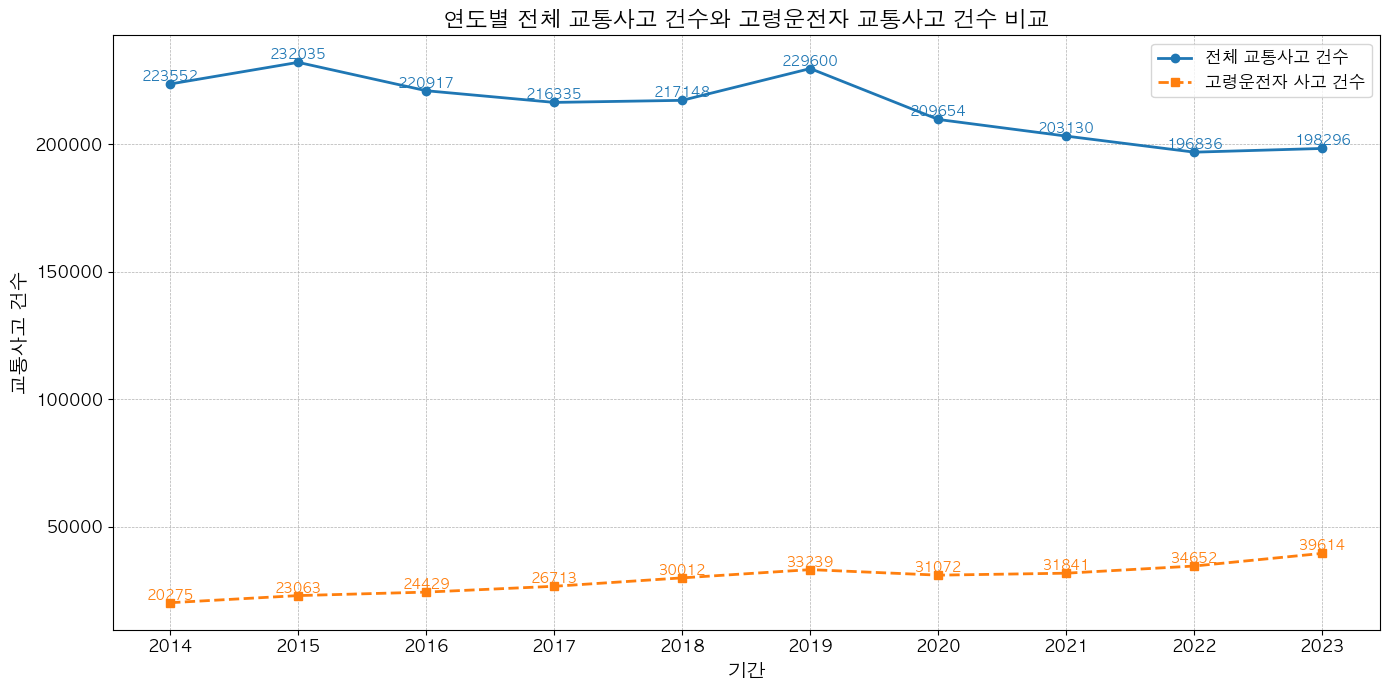

In [13]:
plt.figure(figsize=(14, 7))
plt.title('연도별 전체 교통사고 건수와 고령운전자 교통사고 건수 비교', fontsize=16, fontweight='bold')
plt.xlabel("기간", fontsize=14)
plt.ylabel("교통사고 건수", fontsize=14)

plt.plot(count_accident.index, count_accident['car_accident_count'], label='전체 교통사고 건수', marker="o", markersize=6, linestyle='-', linewidth=2, color='#1f77b4')

for i, value in enumerate(count_accident['car_accident_count']):
    plt.text(count_accident.index[i], value, f'{value}', ha='center', va='bottom', fontsize=10, color='#1f77b4')

plt.plot(senior_accident_count.index, senior_accident_count['car_accident_count'], label='고령운전자 사고 건수', marker="s", markersize=6, linestyle='--', linewidth=2, color='#ff7f0e')

for i, value in enumerate(senior_accident_count['car_accident_count']):
    plt.text(senior_accident_count.index[i], value, f'{value}', ha='center', va='bottom', fontsize=10, color='#ff7f0e')

plt.grid(True, which='both', linestyle='--', linewidth=0.5)

plt.xticks(ticks=count_accident.index, labels=count_accident.index, rotation=0, fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)
plt.tight_layout()


In [92]:
total_senior_count_merge_df = senior_accident_count.merge(count_accident, left_index=True, right_index=True, suffixes=('_senior', '_total'))

In [93]:
total_senior_count_merge_df

,car_accident_count_senior,car_accident_count_total
year,,
2014,20275,223552
2015,23063,232035
2016,24429,220917
2017,26713,216335
2018,30012,217148
2019,33239,229600
2020,31072,209654
2021,31841,203130
2022,34652,196836


In [94]:
total_senior_count_merge_df['ratio'] = total_senior_count_merge_df['car_accident_count_senior']/total_senior_count_merge_df['car_accident_count_total']

Text(0.5, 1.0, '전체 교통사고중 고령운전자 사고 비율 추이')

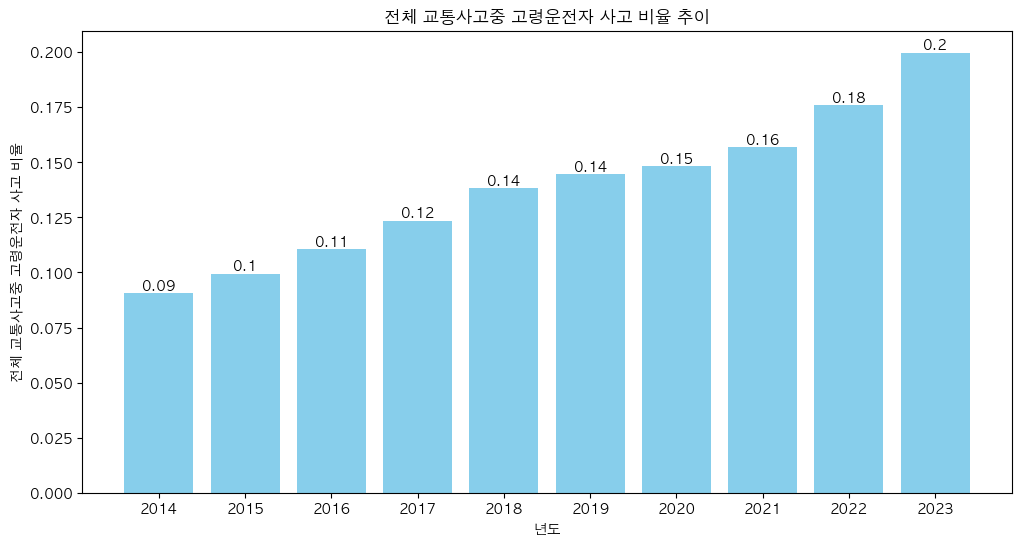

In [96]:
plt.figure(figsize=(12,6))
bars = plt.bar(total_senior_count_merge_df.index, total_senior_count_merge_df['ratio'], color = 'skyblue')
for bar in bars:
    y = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), round(y,2),ha = 'center', va ='bottom')

plt.xlabel('년도')
plt.ylabel('전체 교통사고중 고령운전자 사고 비율')
plt.title('전체 교통사고중 고령운전자 사고 비율 추이')

# 다른 유형의 교통사고와 고령운전자 교통사고 사고건수와 사상자수 비교

In [17]:
query = """
SELECT
    year,
    SUM(car_accident_count) AS total_count,
    SUM(fatalities+injured) AS casualty_count
FROM
  `senior-car-accident.car_accident.highway_traffic_accident`
GROUP BY year
ORDER BY year;
"""

highway_accident = client.query(query).to_dataframe()

In [18]:
query = """
SELECT
    year,
    SUM(car_accident_count) AS total_count,
    SUM(fatalities+injured) AS casualty_count
FROM
  `senior-car-accident.car_accident.unlicensed_traffic_accident`
GROUP BY year
ORDER BY year;
"""

unlicensed_accident = client.query(query).to_dataframe()

In [19]:
query = """
SELECT
    year,
    SUM(car_accident_count) AS total_count,
    SUM(fatalities+injured) AS casualty_count
FROM
  `senior-car-accident.car_accident.Hit-and-run traffic accident`
GROUP BY year
ORDER BY year;
"""

hit_run_accident = client.query(query).to_dataframe()

In [20]:
query = """
SELECT
    year,
    SUM(car_accident_count) AS total_count,
    SUM(fatalities+injured) AS casualty_count
FROM
  `senior-car-accident.car_accident.Drunk_driving_traffic_accident`
GROUP BY year
ORDER BY year;
"""

drunk_accident = client.query(query).to_dataframe()

In [21]:
query = """
SELECT
    year,
    SUM(car_accident_count) AS total_count,
    SUM(fatalities+injured) AS casualty_count
FROM
  `senior-car-accident.car_accident.Elderly_Driver_Traffic_Accident`
GROUP BY year
ORDER BY year;
"""

elderly_drivers_accident = client.query(query).to_dataframe()

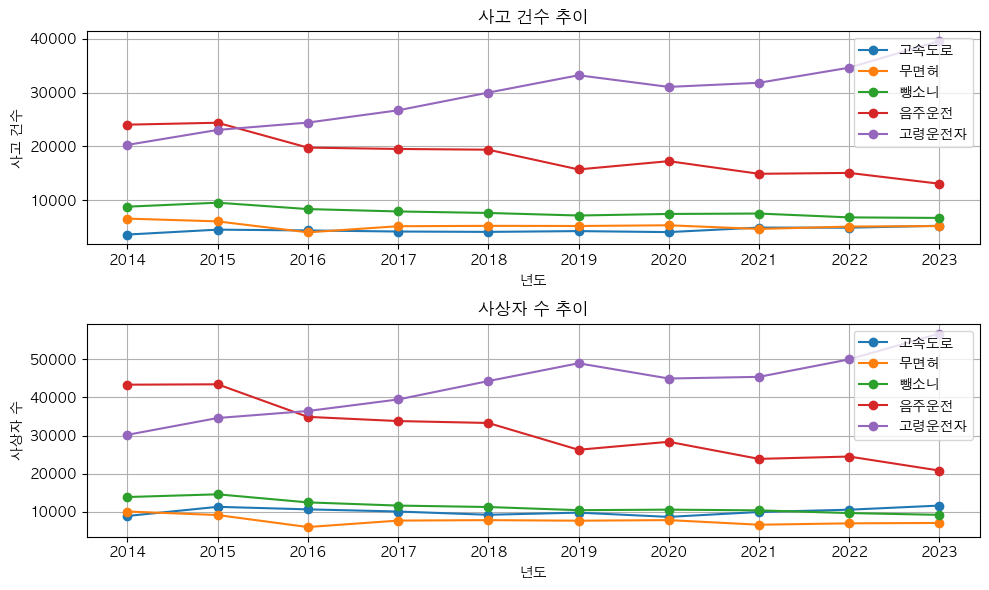

In [68]:
plt.figure(figsize=(10, 6))

# 교통사고수
plt.subplot(2, 1, 1)
plt.plot(highway_accident['year'], highway_accident['total_count'], label='고속도로', marker='o')
plt.plot(unlicensed_accident['year'], unlicensed_accident['total_count'], label='무면허', marker='o')
plt.plot(hit_run_accident['year'], hit_run_accident['total_count'], label='뺑소니', marker='o')
plt.plot(drunk_accident['year'], drunk_accident['total_count'], label='음주운전', marker='o')
plt.plot(elderly_drivers_accident['year'], elderly_drivers_accident['total_count'], label='고령운전자', marker='o')
plt.title('사고 건수 추이')
plt.xlabel('년도')
plt.ylabel('사고 건수')
plt.xticks(elderly_drivers_accident['year']) 
plt.legend()
plt.grid(True)

# 사상자
plt.subplot(2, 1, 2)
plt.plot(highway_accident['year'], highway_accident['casualty_count'], label='고속도로', marker='o')
plt.plot(unlicensed_accident['year'], unlicensed_accident['casualty_count'], label='무면허', marker='o')
plt.plot(hit_run_accident['year'], hit_run_accident['casualty_count'], label='뺑소니', marker='o')
plt.plot(drunk_accident['year'], drunk_accident['casualty_count'], label='음주운전', marker='o')
plt.plot(elderly_drivers_accident['year'], elderly_drivers_accident['casualty_count'], label='고령운전자', marker='o')

plt.title('사상자 수 추이')
plt.xlabel('년도')
plt.ylabel('사상자 수')
plt.xticks(elderly_drivers_accident['year']) 
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


# 고령 운전자 면허자진반납 비율

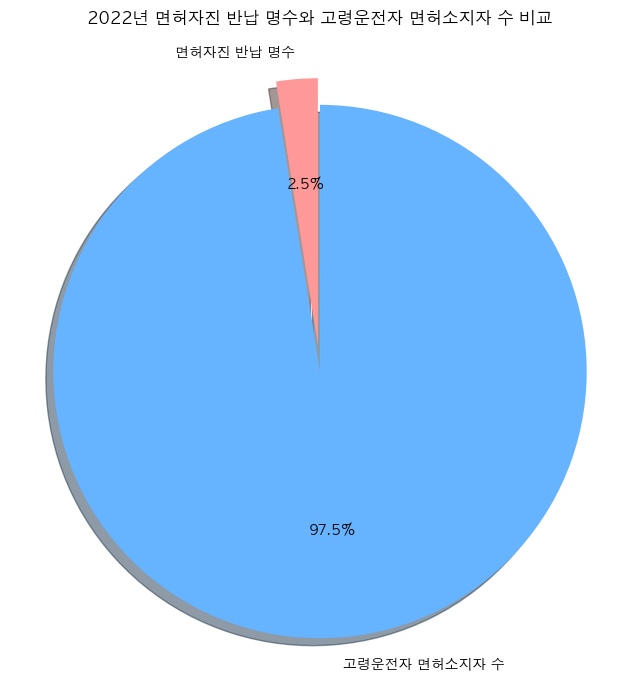

In [69]:
labels = ['면허자진 반납 명수', '고령운전자 면허소지자 수']
sizes = [112942, 4387358]


plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=['#ff9999', '#66b3ff'], shadow=True, explode=(0.1, 0))
plt.title('2022년 면허자진 반납 명수와 고령운전자 면허소지자 수 비교', pad=20)
plt.axis('equal') 
plt.show()


# 고령운전자수(운전면허 소지자수)

In [24]:
query = """
SELECT
  *
FROM
  `senior-car-accident.car_accident.Number_of_Elderly_Drivers`
ORDER BY
    year;
"""

senior_driver = client.query(query).to_dataframe()

In [25]:
senior_driver = senior_driver.set_index('year')

In [26]:
senior_driver

,Number_of_Elderly_Drivers
year,
2014,2078855
2015,2294058
2016,2492776
2017,2797409
2018,3070650
2019,3337165
2020,3682632
2021,4016538
2022,4387358


Text(0.5, 1.0, '년도별 고령 운전자 면허 소지자수')

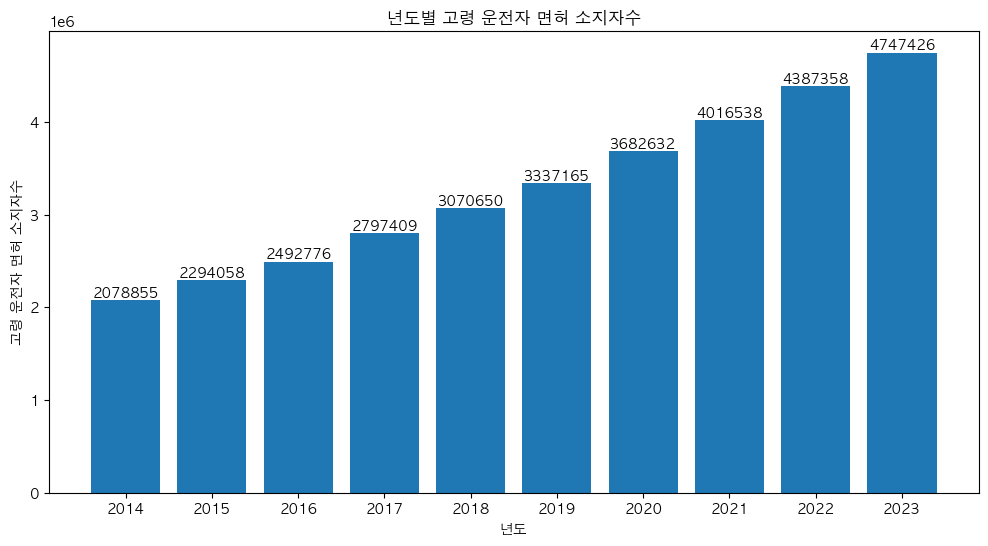

In [27]:
plt.figure(figsize=(12,6))
bars = plt.bar(senior_driver.index, senior_driver['Number_of_Elderly_Drivers'])
for bar in bars:
    y = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), y, ha = 'center', va = 'bottom')

plt.xlabel('년도')
plt.ylabel('고령 운전자 면허 소지자수')
plt.title('년도별 고령 운전자 면허 소지자수')

# 고령운전자 시간대별 교통사고 건수(2023, 2022, 2021년)

In [28]:
query = """
SELECT
  *
FROM
  `senior-car-accident.car_accident.Traffic_Accidents_by_Time_involving_elderly_drivers`;
"""

time_accident = client.query(query).to_dataframe()

In [29]:
time_accident = time_accident.set_index('year')

In [30]:
time_accident = time_accident.transpose()

In [31]:
time_accident

year,2023,2022,2021
12 AM - 2 AM,744,619,396
2 AM - 4 AM,420,318,194
4 AM - 6 AM,919,716,604
6 AM - 8 AM,2294,1982,1875
8 AM - 10 AM,4811,4218,3846
10 AM - 12 PM,5527,4919,4670
12 PM - 2 PM,5591,4914,4549
2 PM - 4 PM,5734,5024,4766
4 PM - 6 PM,5674,4944,4602
6 PM - 8 PM,4412,3913,3608


Text(0.5, 1.0, '시간대별 고령운전자 교통사고건수')

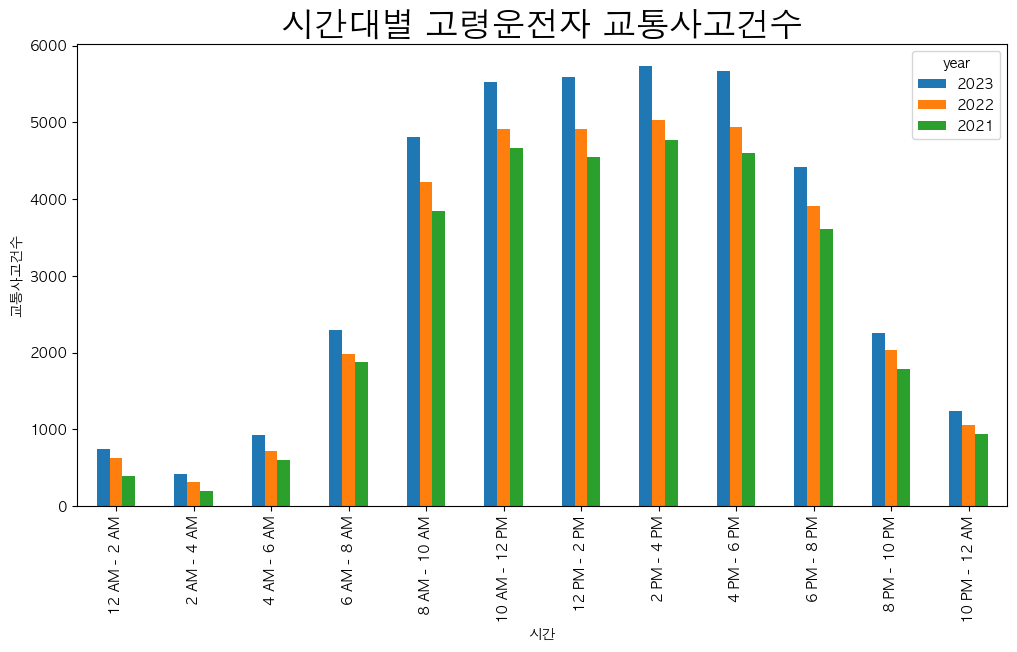

In [32]:
time_accident.plot(kind="bar",
                                figsize = (12, 6),
                                xlabel = "시간",
                                ylabel = "교통사고건수")
plt.title("시간대별 고령운전자 교통사고건수", fontsize=24)

# 시간대별 총 교통사고 건수(2023, 2022, 2021년)

In [33]:
query = """
SELECT
  *
FROM
  `senior-car-accident.car_accident.total_car_accident_by_time`
ORDER BY
    year;
"""
time_total_accident = client.query(query).to_dataframe()

In [34]:
time_total_accident = time_total_accident.set_index('year')

In [35]:
time_total_accident = time_total_accident.transpose()

In [36]:
time_total_accident = time_total_accident[time_total_accident.columns[::-1]]

Text(0.5, 1.0, '시간대별 총 교통사고건수')

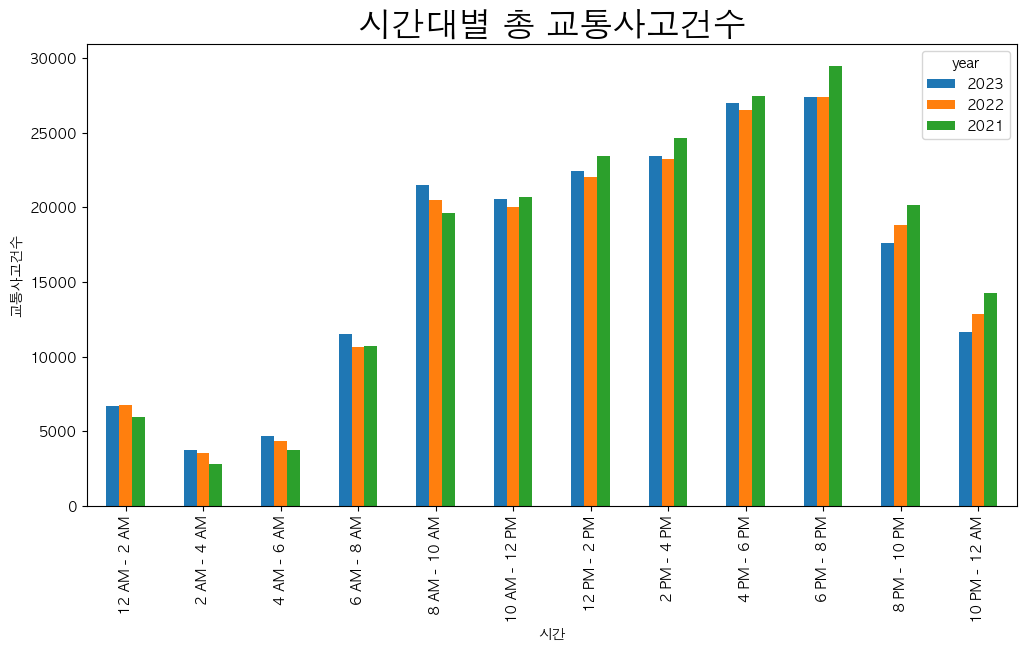

In [37]:
time_total_accident.plot(kind="bar",
                                figsize = (12, 6),
                                xlabel = "시간",
                                ylabel = "교통사고건수")
plt.title("시간대별 총 교통사고건수", fontsize=24)

# 지역별 고령운전자 교통사고 건수와 고령인구수

In [38]:
query = """
SELECT
  *
FROM
  `senior-car-accident.car_accident.car_accident_by_age_region`;
"""
region_age_accident = client.query(query).to_dataframe()

In [39]:
senior_driver_accident = region_age_accident.set_index("region")['65 age over']

In [40]:
senior_driver_accident = senior_driver_accident.sort_values(ascending = False)

In [41]:
senior_driver_accident.index

Index(['경기', '서울', '경북', '경남', '부산', '대구', '전남', '충남', '충북', '전북', '강원', '대전',
       '광주', '인천', '제주', '울산', '세종'],
      dtype='object', name='region')

In [42]:
age_population = pd.read_csv("./data/행정구역_읍면동_별_5세별_주민등록인구_2011년__20240911092752.csv",header=None)

In [43]:
age_population.index

RangeIndex(start=0, stop=56, step=1)

In [44]:
age_population = age_population.iloc[1:][:19].reset_index(drop = True)

In [45]:
age_population.columns = age_population.iloc[0]

In [46]:
age_population.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 24 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   행정구역(동읍면)별  19 non-null     object
 1   항목          19 non-null     object
 2   계           19 non-null     object
 3   0 - 4세      19 non-null     object
 4   5 - 9세      19 non-null     object
 5   10 - 14세    19 non-null     object
 6   15 - 19세    19 non-null     object
 7   20 - 24세    19 non-null     object
 8   25 - 29세    19 non-null     object
 9   30 - 34세    19 non-null     object
 10  35 - 39세    19 non-null     object
 11  40 - 44세    19 non-null     object
 12  45 - 49세    19 non-null     object
 13  50 - 54세    19 non-null     object
 14  55 - 59세    19 non-null     object
 15  60 - 64세    19 non-null     object
 16  65 - 69세    19 non-null     object
 17  70 - 74세    19 non-null     object
 18  75 - 79세    19 non-null     object
 19  80 - 84세    19 non-null     object
 20  85 - 89세    

In [47]:
age_population.columns

Index(['행정구역(동읍면)별', '항목', '계', '0 - 4세', '5 - 9세', '10 - 14세', '15 - 19세',
       '20 - 24세', '25 - 29세', '30 - 34세', '35 - 39세', '40 - 44세', '45 - 49세',
       '50 - 54세', '55 - 59세', '60 - 64세', '65 - 69세', '70 - 74세', '75 - 79세',
       '80 - 84세', '85 - 89세', '90 - 94세', '95 - 99세', '100+'],
      dtype='object', name=0)

In [48]:
age_population = age_population.drop(index = 0)

In [49]:
selected_columns = ['계', '0 - 4세', '5 - 9세', '10 - 14세', '15 - 19세',
       '20 - 24세', '25 - 29세', '30 - 34세', '35 - 39세', '40 - 44세', '45 - 49세',
       '50 - 54세', '55 - 59세', '60 - 64세', '65 - 69세', '70 - 74세', '75 - 79세',
       '80 - 84세', '85 - 89세', '90 - 94세', '95 - 99세', '100+']

In [50]:
age_population[selected_columns] = age_population[selected_columns].apply(lambda x: pd.to_numeric(x, errors='coerce'))

In [51]:
age_population = age_population.drop(columns="항목")

In [52]:
age_population = age_population.set_index("행정구역(동읍면)별")

In [70]:
# 65세 이상 고령인 인구 비율
age_population["65 age over"] = age_population[['65 - 69세', '70 - 74세', '75 - 79세',
       '80 - 84세', '85 - 89세', '90 - 94세', '95 - 99세', '100+']].sum(axis=1)

In [54]:
senior_population = age_population['65 age over']

In [55]:
senior_population = senior_population.iloc[1:]

In [56]:
senior_population = senior_population.sort_values(ascending = False)

In [57]:
senior_population.index

Index(['경기도', '서울특별시', '부산광역시', '경상남도', '경상북도', '인천광역시', '전라남도', '대구광역시',
       '충청남도', '전북특별자치도', '강원특별자치도', '충청북도', '대전광역시', '광주광역시', '울산광역시',
       '제주특별자치도', '세종특별자치시'],
      dtype='object', name='행정구역(동읍면)별')

In [58]:
#인덱스 통일
index_mapping = {'경기도':'경기', '서울특별시':'서울', '부산광역시':'부산', '경상남도':'경남', '경상북도':'경북', '인천광역시':'인천', '전라남도':'전남', '대구광역시':'대구',
       '충청남도':'충남', '전북특별자치도':'전북', '강원특별자치도':'강원', '충청북도':'충북', '대전광역시':'대전', '광주광역시':'광주', '울산광역시':'울산',
       '제주특별자치도':'제주', '세종특별자치시':'세종'}

In [59]:
senior_population.index = senior_population.index.map(index_mapping)

In [60]:
senior_population = senior_population.reindex(senior_driver_accident.index)

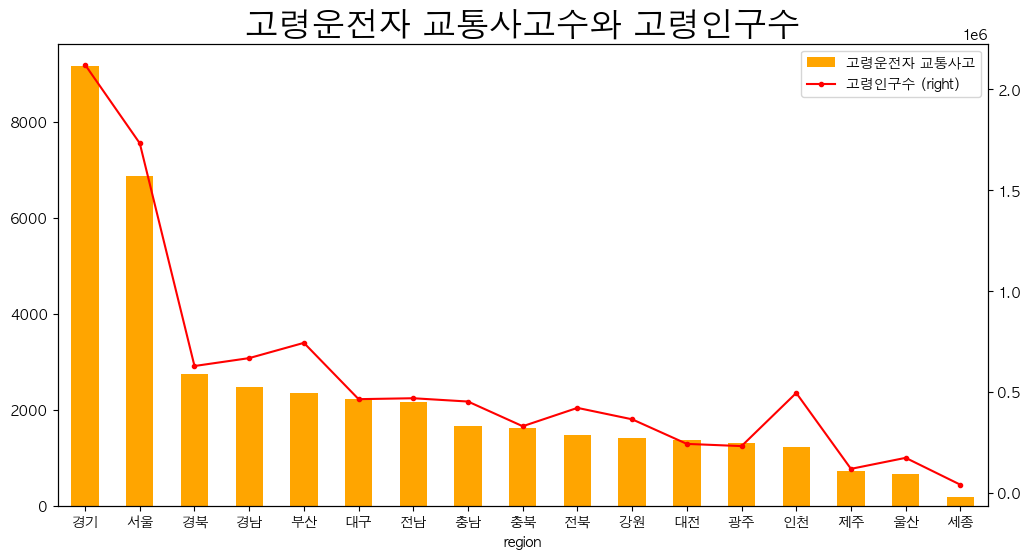

In [61]:
plt.figure(figsize =(12,6))
ax = senior_driver_accident.plot(kind="bar", color = "orange",label = "고령운전자 교통사고")
senior_population.plot(kind="line",ax = ax, color ="red", label = "고령인구수",secondary_y=True, marker ='o', markersize = 3)
plt.title("고령운전자 교통사고수와 고령인구수",fontsize = 24)

lines, labels = ax.get_legend_handles_labels()  
lines2, labels2 = ax.right_ax.get_legend_handles_labels()  
plt.legend(lines + lines2, labels + labels2, loc='upper right')

In [81]:
senior_driver_accident = senior_driver_accident.to_frame()

In [82]:
senior_population = senior_population.to_frame()

In [97]:
senior_accident_population_merge_df = senior_driver_accident.merge(senior_population, left_index=True, right_index=True, suffixes=('_accident_count', '_population'))

In [98]:
senior_accident_population_merge_df

,65 age over_accident_count,65 age over_population
region,,
경기,9170,2122718
서울,6864,1733580
경북,2754,630486
경남,2473,669646
부산,2356,745199
대구,2227,466338
전남,2159,470874
충남,1657,454534
충북,1611,332237


In [99]:
senior_accident_population_merge_df['ratio'] = senior_accident_population_merge_df['65 age over_accident_count']/senior_accident_population_merge_df['65 age over_population']

In [102]:
region_rank = senior_accident_population_merge_df['ratio'].sort_values(ascending=True)

Text(0.5, 1.0, '지역별 고령인구수 대비 고령운전자 사고비율')

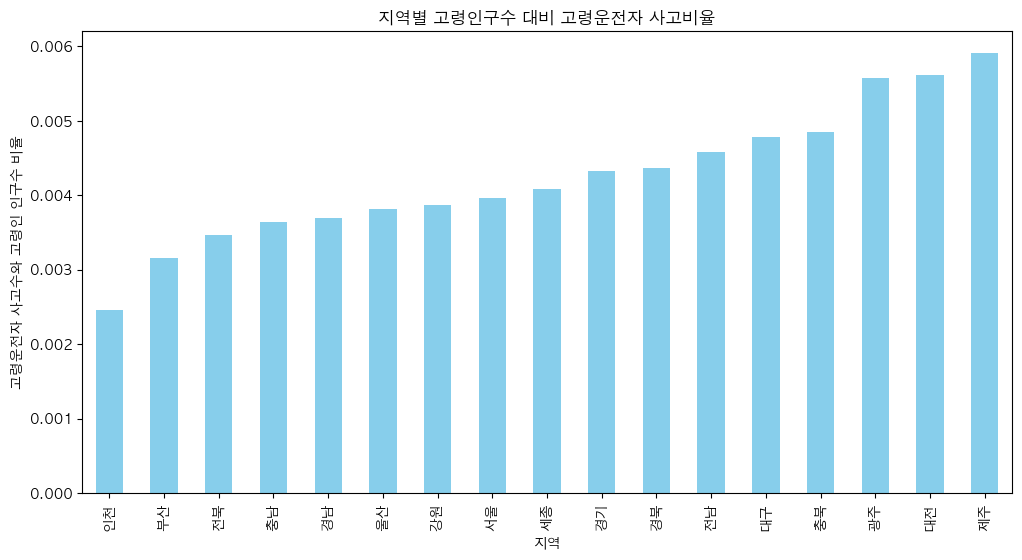

In [112]:
plt.figure(figsize=(12,6))
region_rank.plot(kind="bar", color = 'skyblue')
   
plt.xlabel('지역')
plt.ylabel('고령운전자 사고수와 고령인 인구수 비율')
plt.title('지역별 고령인구수 대비 고령운전자 사고비율')

# 교통법규별 고령운전자 교통사고 건수

In [62]:
query = """
SELECT
  *
FROM
  `senior-car-accident.car_accident.traffic_accidents_involving_elderly _drivers_by_traffic_law_violations`;
"""

law_violation = client.query(query).to_dataframe()

In [63]:
law_violation

,traffic_regulations,car_accident_count,fatalities,injured
0,우선권양보불이행,1,0,1
1,긴급차피양의무위반,1,0,1
2,정비불량,1,0,5
3,진로양보불이행,7,0,10
4,일시정지위반,87,0,143
5,차로위반(진로변경),622,0,848
6,앞지르기방법위반,14,1,14
7,앞지르기금지위반,42,2,69
8,직진우회전진행방해,1070,4,1667
9,부당한회전,339,6,431


In [64]:
law_violation = law_violation.set_index("traffic_regulations")

In [65]:
law_violation = law_violation[["car_accident_count"]]

In [66]:
law_violation

,car_accident_count
traffic_regulations,
우선권양보불이행,1
긴급차피양의무위반,1
정비불량,1
진로양보불이행,7
일시정지위반,87
차로위반(진로변경),622
앞지르기방법위반,14
앞지르기금지위반,42
직진우회전진행방해,1070


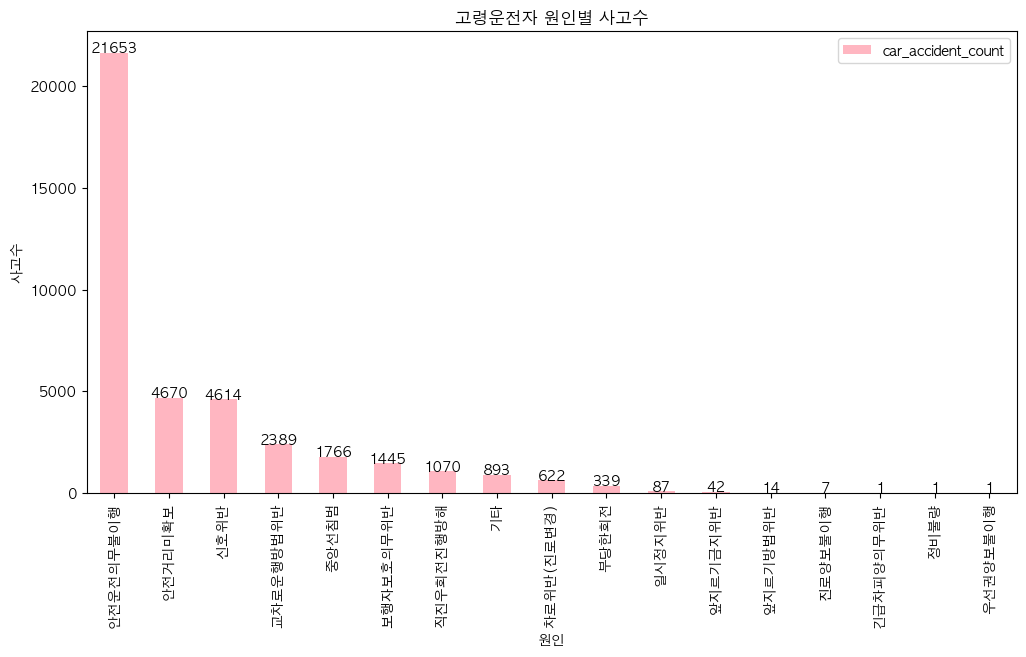

In [67]:
law_violation_sorted = law_violation.sort_values(by='car_accident_count', ascending=False)
ax = law_violation_sorted.plot(kind='bar',
                               color = '#FFB6C1',
                               title="고령운전자 원인별 사고수",
                               figsize=(12, 6),
                               xlabel="원인",
                               ylabel="사고수")
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width()/2, p.get_height()),
                ha = 'center')

plt.show()


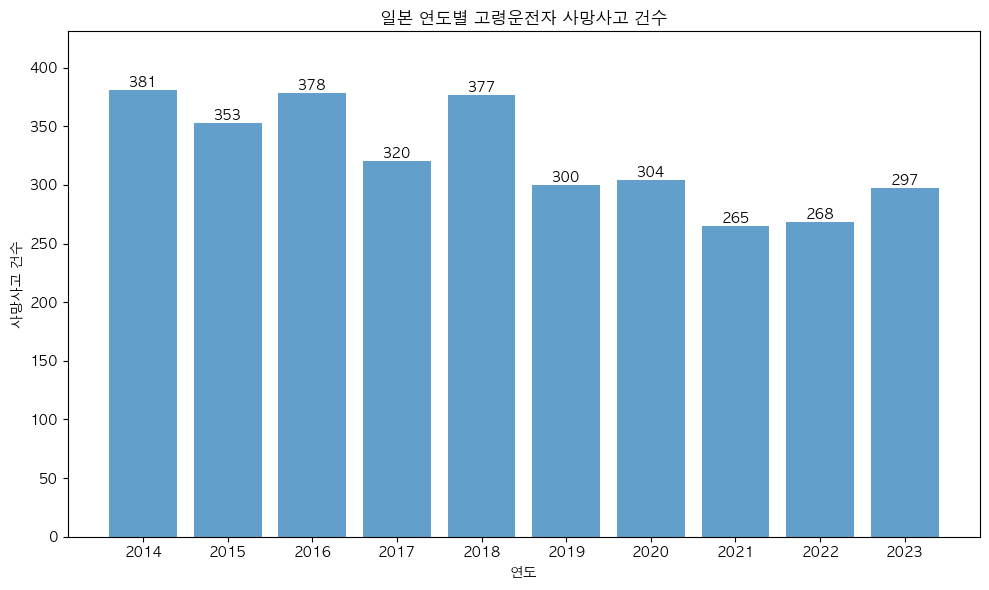

In [113]:
years = [2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023]
accidents = [381, 353, 378, 320, 377, 300, 304, 265, 268, 297]

plt.figure(figsize=(10, 6))
bars = plt.bar(years, accidents, alpha=0.7)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom')

plt.title('일본 연도별 고령운전자 사망사고 건수')
plt.xlabel('연도')
plt.ylabel('사망사고 건수')
plt.xticks(years)  
plt.ylim(0, max(accidents) + 50)  
plt.gca().yaxis.grid(False)

plt.tight_layout()
plt.show()
